In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. 
For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt. 

The dataset for this homework can be downloaded from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
unzip data.zip
```

and extracted to the root folder into a folder called "bee-wasp". The data is intentionally not included in this repo


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`


`binary crossentropy`

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [56]:
!pip install -q tensorflow

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

%matplotlib inline

In [58]:

inputs = keras.Input(shape=(150, 150, 3))

feature_map = keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)

vectors = keras.layers.MaxPooling2D(pool_size=(2,2))(feature_map)
flattened = keras.layers.Flatten()(vectors)

dense_layer = keras.layers.Dense(64, activation='relu')(flattened)
outputs = keras.layers.Dense(1, activation='sigmoid')(dense_layer)

model = keras.Model(inputs, outputs)

# use legacy because on mac M1/M2 SGD is slow
optimizer = tf.keras.optimizers.legacy.SGD(
    learning_rate=0.01,
    momentum=0.8
)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 175232)            0         
                                                                 
 dense_20 (Dense)            (None, 64)                11214912  
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                          

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

# 896

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [59]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './bee-wasp/train',
    class_mode='binary',
    shuffle=True,
    target_size=(150, 150),
    batch_size=20
)
# model.predict(train_ds)

Found 3677 images belonging to 2 classes.


In [60]:

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './bee-wasp/test',
    class_mode='binary',
    shuffle=True,
    target_size=(150, 150),
    batch_size=20
)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Found 918 images belonging to 2 classes.
Epoch 1/10
184/184 [==============================] - 8s 43ms/step - loss: 0.6371 - accuracy: 0.6337 - val_loss: 0.5987 - val_accuracy: 0.6732
Epoch 2/10
184/184 [==============================] - 7s 40ms/step - loss: 0.5841 - accuracy: 0.6981 - val_loss: 0.6022 - val_accuracy: 0.6645
Epoch 3/10
184/184 [==============================] - 7s 40ms/step - loss: 0.5391 - accuracy: 0.7403 - val_loss: 0.5442 - val_accuracy: 0.7397
Epoch 4/10
184/184 [==============================] - 7s 40ms/step - loss: 0.4982 - accuracy: 0.7683 - val_loss: 0.5627 - val_accuracy: 0.7222
Epoch 5/10
184/184 [==============================] - 7s 39ms/step - loss: 0.4345 - accuracy: 0.8094 - val_loss: 0.5721 - val_accuracy: 0.7495
Epoch 6/10
184/184 [==============================] - 7s 40ms/step - loss: 0.3544 - accuracy: 0.8589 - val_loss: 0.5705 - val_accuracy: 0.7636
Epoch 7/10
184/184 [==============================] - 8s 41ms/step - loss: 0.2556 - accuracy: 0.9032 

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [61]:
# get the median training accuracy for all the epochs from the history object
training_accuracy = history.history['accuracy']
np.median(training_accuracy)

0.8341038823127747

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [62]:
training_loss = history.history['loss']
# get the standard deviation of the training loss for all the epochs from the history object
np.std(training_loss)

0.19752818675508646

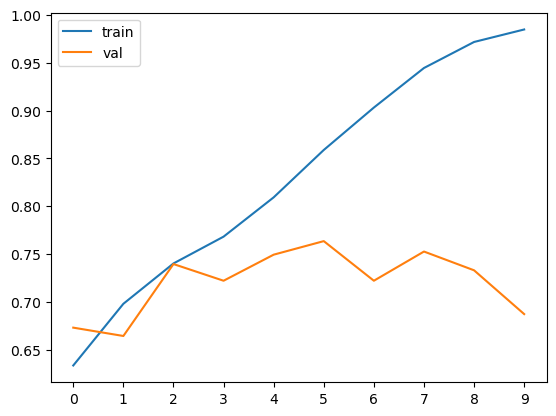

In [63]:
plt.plot(history.history['accuracy'], label=('train'))
plt.plot(history.history['val_accuracy'], label=('val'))

plt.xticks(np.arange(10))
plt.legend()

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [64]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    './bee-wasp/train',
    class_mode='binary',
    shuffle=True,
    target_size=(150, 150),
    batch_size=20
)

Found 3677 images belonging to 2 classes.




Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.


In [65]:
history_after_augmentation = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 15s 82ms/step - loss: 0.5492 - accuracy: 0.7501 - val_loss: 0.5688 - val_accuracy: 0.7603
Epoch 2/10
184/184 [==============================] - 15s 79ms/step - loss: 0.5047 - accuracy: 0.7721 - val_loss: 0.5225 - val_accuracy: 0.7614
Epoch 3/10
184/184 [==============================] - 15s 80ms/step - loss: 0.4904 - accuracy: 0.7735 - val_loss: 0.5284 - val_accuracy: 0.7734
Epoch 4/10
184/184 [==============================] - 14s 78ms/step - loss: 0.4973 - accuracy: 0.7721 - val_loss: 0.5036 - val_accuracy: 0.7865
Epoch 5/10
184/184 [==============================] - 15s 82ms/step - loss: 0.4742 - accuracy: 0.7900 - val_loss: 0.5141 - val_accuracy: 0.7756
Epoch 6/10
184/184 [==============================] - 15s 82ms/step - loss: 0.4781 - accuracy: 0.7852 - val_loss: 0.4868 - val_accuracy: 0.7963
Epoch 7/10
184/184 [==============================] - 16s 84ms/step - loss: 0.4816 - accuracy: 0.7781 - val_loss: 0.5227 - val_accuracy:

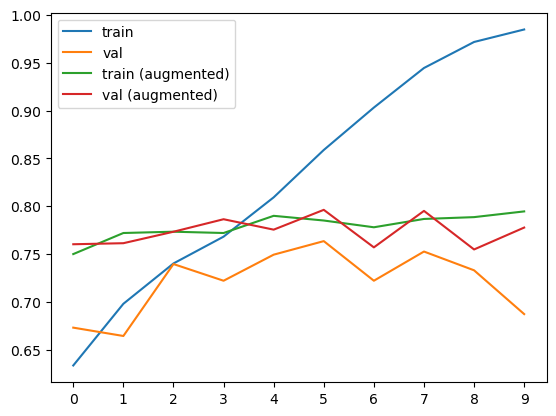

In [66]:
plt.plot(history.history['accuracy'], label=('train'))
plt.plot(history.history['val_accuracy'], label=('val'))
plt.plot(history_after_augmentation.history['accuracy'], label=('train (augmented)'))
plt.plot(history_after_augmentation.history['val_accuracy'], label=('val (augmented)'))

plt.xticks(np.arange(10))
plt.legend()

In [73]:
# get the median training accuracy for all the epochs from the history object
test_loss = history.history['val_loss']
np.mean(test_loss)

0.6700503766536713

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [74]:
test_accuracy = history.history['val_accuracy'][5:]
np.median(test_accuracy)

0.7331154942512512